In [69]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
cd ../TileEM/


/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [7]:
import pandas as pd

In [14]:
worker_tbl = pd.read_csv("worker_obj_qualities.csv")

In [18]:
object_lst =list(worker_tbl.object_id)

In [19]:
for objid in object_lst : 
    data= worker_tbl[worker_tbl["object_id"]==objid]
    
    

In [21]:
data["P+R"]=data["Precision"]+data["Recall"]

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
sorted_df = data.sort(columns=["P+R"],ascending=False)

In [37]:
top5 = sorted_df[:5]
worst5 = sorted_df[-5:]

In [38]:
worst5

,object_id,worker_id,Qj,Q1[A>1],Q2[A>1],Q1[A>10],Q2[A>10],Q1[A>50],Q2[A>50],Q1[A>100],Q2[A>100],Precision,Recall,P+R
1783,47,246,0.401551,0.541516,0.382583,0.777778,0.397123,1.0,0.400518,1,0.401035,0.905245,0.833296,1.738542
1759,47,187,0.415769,0.519856,0.401663,0.703704,0.412380,1.0,0.414760,1,0.415265,0.870979,0.823997,1.694976
1781,47,241,0.530375,0.476534,0.537671,0.592593,0.529643,1.0,0.529564,1,0.529970,0.908436,0.765030,1.673466
1773,47,214,0.528651,0.505415,0.531800,0.629630,0.527463,1.0,0.527838,1,0.528245,0.517270,0.910974,1.428245
1749,47,126,0.510125,0.541516,0.505871,0.518519,0.510026,0.5,0.510142,0,0.510565,0.000000,0.000000,0.000000


In [39]:
top5

,object_id,worker_id,Qj,Q1[A>1],Q2[A>1],Q1[A>10],Q2[A>10],Q1[A>50],Q2[A>50],Q1[A>100],Q2[A>100],Precision,Recall,P+R
1784,47,263,0.706161,0.787004,0.695205,0.925926,0.703575,1.00,0.705654,1,0.705908,0.976388,0.912542,1.888930
1751,47,133,0.662215,0.657040,0.662916,0.777778,0.660854,0.50,0.662495,1,0.661923,0.880488,0.995250,1.875738
1746,47,115,0.655321,0.700361,0.649217,0.703704,0.654752,0.75,0.655158,1,0.655024,0.918513,0.945813,1.864326
1762,47,175,0.637225,0.631769,0.637965,0.740741,0.636007,1.00,0.636599,1,0.636912,0.865641,0.991618,1.857259
1771,47,82,0.502801,0.682310,0.478474,0.925926,0.497820,1.00,0.501942,1,0.502372,0.946058,0.899817,1.845875


In [40]:
from analysis_toolbox import *

In [76]:
img_info,object_tbl,bb_info,hit_info = load_info()
bb_objects = bb_info[bb_info["object_id"]==objid]
worst5_workers= list(worst5["worker_id"])
top5_workers= list(top5["worker_id"])
worker_lst = worst5_workers+top5_workers

In [77]:
worker_lst

[246, 187, 241, 214, 126, 263, 133, 115, 175, 82]

In [56]:
bb_objects[bb_objects["worker_id"].isin(worker_lst)]

,object_id,worker_id,x_locs,y_locs
229,47,115,"[182, 169, 168, 208, 213, 197, 196, 190, 184]","[126, 126, 178, 182, 129, 127, 121, 118, 120]"
326,47,126,"[359, 372, 387, 397, 406, 413, 412, 412, 407, ...","[134, 130, 129, 129, 132, 145, 157, 165, 171, ..."
449,47,133,"[167, 212, 211, 166]","[124, 126, 183, 181]"
1028,47,187,"[165, 167, 170, 180, 185, 195, 201, 210, 207, ...","[177, 152, 127, 124, 114, 117, 123, 128, 144, ..."
1103,47,175,"[167, 180, 187, 198, 201, 215, 211, 205, 174, ...","[123, 125, 115, 118, 127, 128, 179, 183, 176, ..."
1429,47,82,"[171, 168, 167, 187, 209, 207, 212]","[124, 150, 177, 179, 178, 157, 126]"
1451,47,214,"[198, 196, 183, 181, 173, 171, 172, 165, 164, ...","[77, 67, 67, 75, 77, 105, 121, 122, 163, 177, ..."
1798,47,241,"[181, 189, 194, 198, 209, 204, 203, 181, 170, ...","[124, 115, 119, 124, 129, 154, 175, 174, 174, ..."
1841,47,246,"[170, 168, 181, 195, 205, 206, 210, 210, 211, ...","[125, 172, 176, 176, 176, 161, 149, 136, 126, ..."
1921,47,263,"[168, 168, 209, 211]","[127, 176, 179, 127]"


In [88]:
from BB2TileExact import * 

In [95]:
DATA_DIR="sampletopworst5"

In [96]:
mkdir sampletopworst5

In [106]:
wlst, tiles,indMat = createObjIndicatorMatrix(objid,worker_lst=worker_lst,SAVE=True)

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (188.862 124.972, 196.72 125.321) and LINESTRING (191.949 125.109, 182.438 124.686) at 189.0649039954622 124.98066239979832
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (190.434 125.042, 190.23 125.032) and LINESTRING (191.949 125.109, 182.438 124.686) at 190.28890992597701 125.03506266337676
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (168.722 140.444, 168.69 142.144) and LINESTRING (168.69 142.109, 168.722 140.444) at 168.71639731979846 140.7473393704787


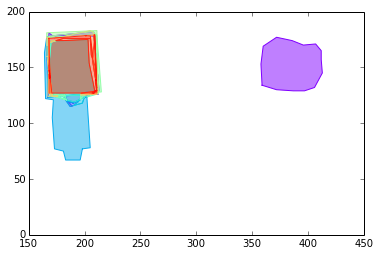

In [107]:
visualizeTilesSeparate(tiles)

In [108]:
for objid in tqdm(object_lst): 
    data= worker_tbl[worker_tbl["object_id"]==objid]
    data["P+R"]=data["Precision"]+data["Recall"]
    sorted_df = data.sort(columns=["P+R"],ascending=False)
    top5 = sorted_df[:5]
    worst5 = sorted_df[-5:]
    wlst, tiles,indMat = createObjIndicatorMatrix(objid,worker_lst=worker_lst,SAVE=True)

  8%|▊         | 146/1785 [01:18<14:39,  1.86it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (499.85 192.525, 499.85 192.525) and LINESTRING (499.85 192.525, 499.85 192.525) at 499.84999999999997 192.52499999999978
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (495.25 177.958, 494.883 176.795) and LINESTRING (494.864 176.737, 495.25 177.958) at 494.91647441536048 176.90216898197482
  8%|▊         | 147/1785 [01:20<14:57,  1.82it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (499.85 192.525, 499.85 192.525) and LINESTRING (499.85 192.525, 499.85 192.525) at 499.84999999999997 192.52499999999978
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (495.25 177.958, 494.883 176.795) and LINESTRING (494.864 176.737, 495.25 177.958) at 494.91647441536048 176.90216898197482
  8%|▊         | 148/1785 [01:22<15:15,  1.79it/s]ERROR:shapely.